# **Proyek Akhir : Klasifikasi Gambar**

## **DATA DIRI**

*   Nama: Agus Hery
*   Domisili : Bali
*   This projeck used GPU Hardware Accelerator
*   Accuracy above 99% and Validation Accuracy above 97%


### **Import Library for Extracing and Set Data Location**

In [1]:
# import library
import zipfile
import os
import glob 
import shutil
print('Setup Complete')

Setup Complete


### **Import Library for Machine Learning and TensorFlow**

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from google.colab import files
from keras.preprocessing import image
import numpy as np
print('Setup Complete')

Setup Complete


### ***Import Library for Data Visualization***

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
print('Setup Complete')

Setup Complete


### ***Get dataset from wget***

In [4]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-14 08:09:06--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.34MB/s    in 5m 5s   

2021-05-14 08:14:12 (1.01 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



### ***Setup file***

In [5]:
# Extrac zip file
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
# Intiating and create folder for ALL training(X) and Validation (y) 
main = '/tmp/rockpaperscissors/rps-cv-images'

# Train(X)
X_dir = os.path.join(main, 'X')
os.mkdir(X_dir)

# Validation
y_dir = os.path.join(main, 'y')
os.mkdir(y_dir)

### **Split file dataset to Train (X) for 60% and Validation (y) for 40%**

In [7]:
# Split dataset
rock_dir = os.path.join(main,'rock')
paper_dir = os.path.join(main, 'paper')
scissors_dir = os.path.join(main, 'scissors')
X_rock_file, y_rock_file = train_test_split(os.listdir(rock_dir), test_size=0.4, random_state=50)
X_paper_file, y_paper_file = train_test_split(os.listdir(paper_dir), test_size=0.4, random_state=50)
X_scissors_file, y_scissors_file = train_test_split(os.listdir(scissors_dir), test_size=0.4, random_state=50)

In [8]:
# Initiating and Create folder for X and y dataset each category

# Rock
X_rock = os.path.join(X_dir, 'rock')
y_rock = os.path.join(y_dir, 'rock')
os.mkdir(X_rock)
os.mkdir(y_rock)

# Paper
X_paper = os.path.join(X_dir, 'paper')
y_paper = os.path.join(y_dir, 'paper')
os.mkdir(X_paper)
os.mkdir(y_paper)

# Scissor
X_scissors = os.path.join(X_dir, 'scissors')
y_scissors = os.path.join(y_dir, 'scissors')
os.mkdir(X_scissors)
os.mkdir(y_scissors)

In [9]:
# insert result split dataset into Train and Validation each category
# ROCK
for i in X_rock_file:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(X_rock, i))
for i in y_rock_file:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(y_rock, i))

# PAPER
for i in X_paper_file:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(X_paper, i))
for i in y_paper_file:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(y_paper, i))

# SCISSORS
for i in X_scissors_file:
  shutil.copy(os.path.join(scissors_dir, i), os.path.join(X_scissors, i))
for i in y_scissors_file:
  shutil.copy(os.path.join(scissors_dir, i), os.path.join(y_scissors, i))

### **Image Augmentation**

In [10]:
X_datagen = ImageDataGenerator(
    rotation_range = 30,
    rescale = 1./255,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'constant',
)
y_datagen = ImageDataGenerator(
    rotation_range = 30,
    rescale = 1./225,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'constant'
)
 
 
X_generator = X_datagen.flow_from_directory(
    X_dir,
    target_size=(100,100),
    batch_size= 32,
    class_mode='categorical'
)
 
y_generator = y_datagen.flow_from_directory(
    y_dir,
    target_size = (100,100),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


### **Architecture CNN**

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (100,100,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(64, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0

### **Train Data**

Create class callback for prevent overfitting and stop training once accuracy is met



In [12]:
class callBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.99 and logs.get('val_accuracy') > 0.97):
      print("\nstop training, accuracy above 99%")
      self.model.stop_training = True

stop = callBack()

In [13]:
with tf.device("/device:GPU:0"):
  history = model.fit(
      X_generator,
      steps_per_epoch = 41, 
      epochs = 30,
      validation_data = y_generator,
      validation_steps = 21,
      verbose =2,
        callbacks=[stop]
      )

Epoch 1/30
41/41 - 40s - loss: 1.0502 - accuracy: 0.4566 - val_loss: 0.9391 - val_accuracy: 0.6786
Epoch 2/30
41/41 - 8s - loss: 0.6715 - accuracy: 0.7576 - val_loss: 0.6284 - val_accuracy: 0.6964
Epoch 3/30
41/41 - 8s - loss: 0.3557 - accuracy: 0.8758 - val_loss: 0.2208 - val_accuracy: 0.9182
Epoch 4/30
41/41 - 8s - loss: 0.2835 - accuracy: 0.8941 - val_loss: 0.2898 - val_accuracy: 0.8988
Epoch 5/30
41/41 - 8s - loss: 0.2419 - accuracy: 0.9024 - val_loss: 0.1980 - val_accuracy: 0.9167
Epoch 6/30
41/41 - 7s - loss: 0.1869 - accuracy: 0.9337 - val_loss: 0.1599 - val_accuracy: 0.9449
Epoch 7/30
41/41 - 7s - loss: 0.1597 - accuracy: 0.9405 - val_loss: 0.1275 - val_accuracy: 0.9524
Epoch 8/30
41/41 - 7s - loss: 0.1197 - accuracy: 0.9573 - val_loss: 0.2958 - val_accuracy: 0.8943
Epoch 9/30
41/41 - 8s - loss: 0.2136 - accuracy: 0.9245 - val_loss: 0.2030 - val_accuracy: 0.9286
Epoch 10/30
41/41 - 7s - loss: 0.1081 - accuracy: 0.9657 - val_loss: 0.0979 - val_accuracy: 0.9747
Epoch 11/30
41/41 

### **Training Visualizaton**


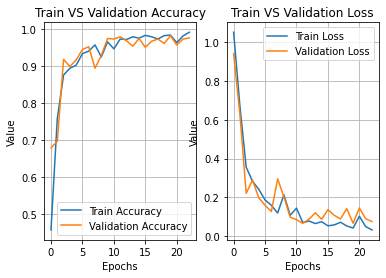

In [14]:
#Accuracy
plt.subplot(1,2,1)
sns.lineplot(
    x=history.epoch,
    y=history.history['accuracy'],
    label='Train Accuracy'
)
sns.lineplot(
    x=history.epoch,
    y=history.history['val_accuracy'],
    label='Validation Accuracy'
)
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Train VS Validation Accuracy')
plt.grid()

plt.subplot(1,2,2)
sns.lineplot(
    x=history.epoch,
    y=history.history['loss'],
    label='Train Loss'
)
sns.lineplot(
    x=history.epoch,
    y=history.history['val_loss'],
    label='Validation Loss'
)
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Train VS Validation Loss')
plt.grid()

### **Predict Image**

Saving 04l5I8TqdzF9WDMJ.png to 04l5I8TqdzF9WDMJ (1).png


Prediction Result :  [1. 0. 0.] 

Category : Paper


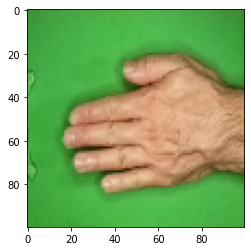

In [16]:
# Upload File to google colabs
uploaded = files.upload()

for file_upload in uploaded.keys():

  path = file_upload
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print("\n")
  print('Prediction Result : ',classes[0],'\n')

  if classes[0][0] == 1:
    print('Category : Paper')
  elif classes[0][1] == 1:
    print('Category : Rock')
  else:
    print('Category : Scissor')